In [111]:
%%time
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
Wall time: 36 ms


In [112]:
path3 = r'C:\Users\DenAS\Downloads\11AA\Source\1.3\NYC' + '//'
FName3 = 'train.csv'
full_patch3 = path3 + FName3
full_patch3

'C:\\Users\\DenAS\\Downloads\\11AA\\Source\\1.3\\NYC//train.csv'

In [113]:
%%time
df = pd.read_csv(full_patch3) #, dtype={'pickup_datetime': float64,'dropoff_datetime': float64})
print(df.shape)

(1458644, 11)
Wall time: 8.23 s


In [114]:
%%time
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['trip_time'] = df.dropoff_datetime - df.pickup_datetime

Wall time: 2.13 s


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_time             1458644 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 133.5+ MB


In [116]:
def t_interval(row):
    return row['pickup_datetime'].hour

In [117]:
%%time
df['Hour'] = df.apply( t_interval, axis = 1 )

Wall time: 4min 3s


In [118]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
#data.drop('weight_pounds',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 9 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_time             1458644 non-null timedelta64[ns]
Hour                  1458644 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 100.2+ MB


In [119]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,trip_time,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455,00:07:35,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663,00:11:03,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124,00:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429,00:07:09,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435,00:07:15,13


In [120]:
df.describe()

,vendor_id,passenger_count,trip_duration,trip_time,Hour
count,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
mean,1.534950e+00,1.664530e+00,9.594923e+02,0 days 00:15:59.492272,1.360648e+01
std,4.987772e-01,1.314242e+00,5.237432e+03,0 days 01:27:17.431724,6.399693e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,0 days 00:00:01,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.970000e+02,0 days 00:06:37,9.000000e+00
50%,2.000000e+00,1.000000e+00,6.620000e+02,0 days 00:11:02,1.400000e+01
75%,2.000000e+00,2.000000e+00,1.075000e+03,0 days 00:17:55,1.900000e+01
max,2.000000e+00,9.000000e+00,3.526282e+06,40 days 19:31:22,2.300000e+01


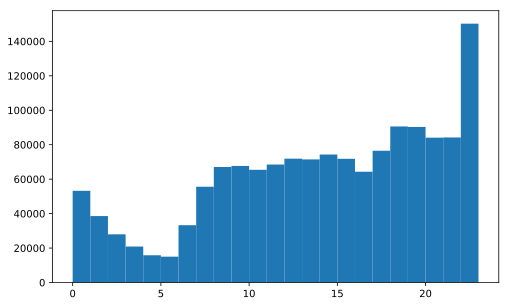

In [121]:
plt.hist( df['Hour'], bins = 23)
plt.show()

In [122]:
df1 = df[['passenger_count','trip_duration'] + ['Hour']]\
    .groupby('Hour').sum()

In [123]:
df1.passenger_count = df1.passenger_count/df1.passenger_count.mean()
df1.trip_duration = df1.trip_duration/df1.trip_duration.mean()
df1.style.bar()

,passenger_count,trip_duration
Hour,,
0,0.890042,0.855272
1,0.651738,0.597325
2,0.471359,0.426945
3,0.352336,0.318924
4,0.266041,0.249676
5,0.233886,0.211543
6,0.505126,0.454654
7,0.865983,0.793035
8,1.06625,1.0631


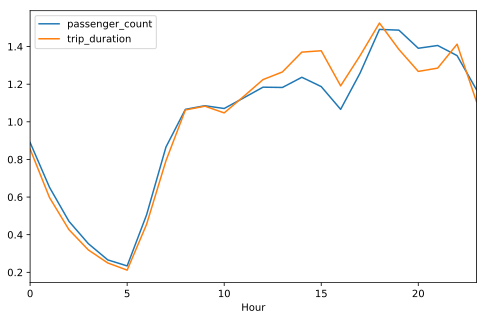

In [124]:
df1.plot();

In [131]:
df2 = df[['passenger_count','trip_duration'] + ['Hour']]\
    .groupby('Hour').sum()
df2.head()    

,passenger_count,trip_duration
Hour,,
0,90041,49875128
1,65933,34832973
2,47685,24897232
3,35644,18598031
4,26914,14559852


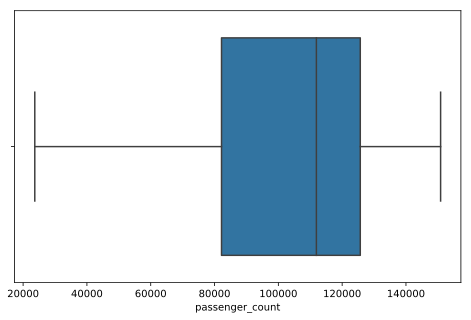

In [134]:
sns.boxplot(data=df2, x = 'passenger_count')

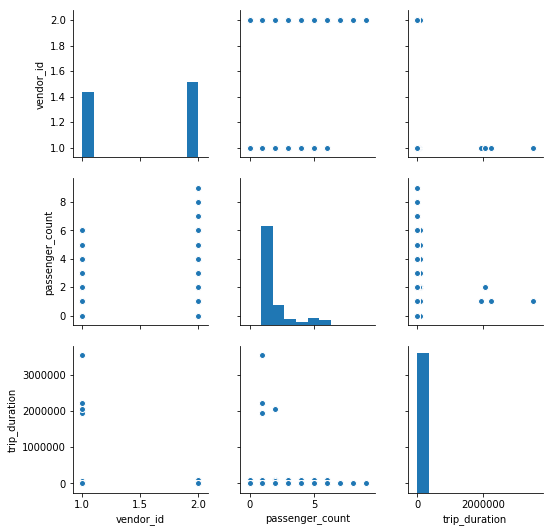

In [135]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['vendor_id', 'passenger_count', 'trip_duration']]);
sns_plot.savefig('pairplot.png')

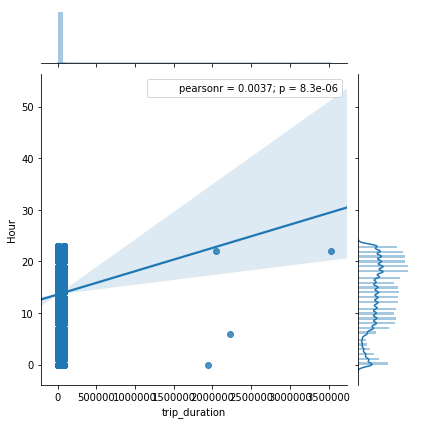

In [136]:
sns.jointplot(x='trip_duration', y='Hour', 
              data=df, kind='reg');

In [137]:
df3 = df.groupby('Hour')[['id']].count()
df3['passenger_count'] = df.groupby('Hour')[['passenger_count']].sum()
df3.head()

,id,passenger_count
Hour,,
0,53248,90041
1,38571,65933
2,27972,47685
3,20895,35644
4,15792,26914


In [138]:
df3.reset_index()

,Hour,id,passenger_count
0,0,53248,90041
1,1,38571,65933
2,2,27972,47685
3,3,20895,35644
4,4,15792,26914
5,5,15002,23661
6,6,33248,51101
7,7,55600,87607
8,8,67053,107867
9,9,67663,109825


In [108]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [139]:
trace0 = go.Scatter(
    x=df3.index,
    y=df3.id,
    name='Trip count'
)

trace1 = go.Scatter(
    x=df3.index,
    y=df3.passenger_count,
    name='Passenger count'
)

data = [trace0, trace1]
layout = {'title': ' The ratio of the number of trips to the number of passengers'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)